In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

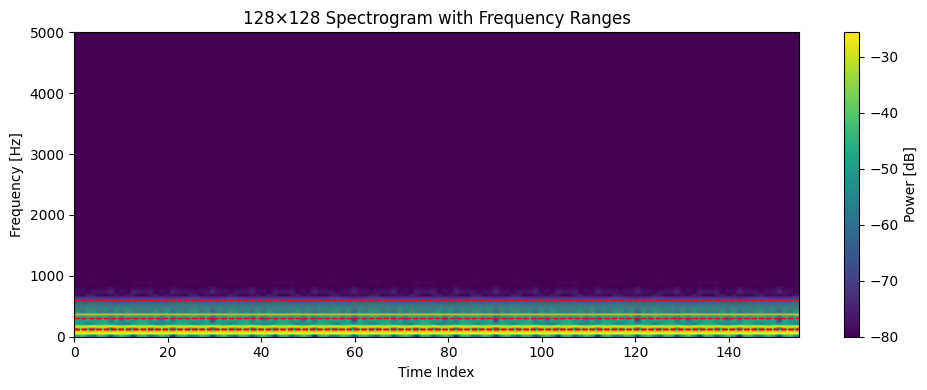

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram


fs = 10000 


t = np.linspace(0, 2, 2 * fs, endpoint=False)
segment = (
    0.5 * np.sin(2 * np.pi * 50 * t) +
    0.3 * np.sin(2 * np.pi * 150 * t) +
    0.2 * np.sin(2 * np.pi * 350 * t)
)


frequency_ranges = [
    (120, 125),
    (121, 122),
    (300, 600)
]


out_shape = (128, 128)


def segment_to_spectrogram(segment, fs, out_shape):
    f, t, Sxx = spectrogram(segment, fs, nperseg=256, noverlap=128)
    Sxx_db = 10 * np.log10(Sxx + 1e-8)
    h, w = min(Sxx_db.shape[0], out_shape[0]), min(Sxx_db.shape[1], out_shape[1])
    out = np.zeros(out_shape)
    out[:h, :w] = Sxx_db[:h, :w]
    return f, t, out

f, t_vals, Sxx_db_128 = segment_to_spectrogram(segment, fs, out_shape)


plt.figure(figsize=(10, 4))
extent = [0, len(t_vals), 0, fs // 2]

plt.imshow(Sxx_db_128, aspect='auto', origin='lower', extent=extent, cmap='viridis')
plt.colorbar(label='Power [dB]')
plt.xlabel('Time Index')
plt.ylabel('Frequency [Hz]')
plt.title('128×128 Spectrogram with Frequency Ranges')


for low, high in frequency_ranges:
    plt.axhline(y=low, color='red', linestyle='--', linewidth=1)
    plt.axhline(y=high, color='red', linestyle='--', linewidth=1)
    plt.fill_betweenx(np.linspace(low, high, 2), 0, len(t_vals), color='red', alpha=0.1)

plt.tight_layout()
plt.show()


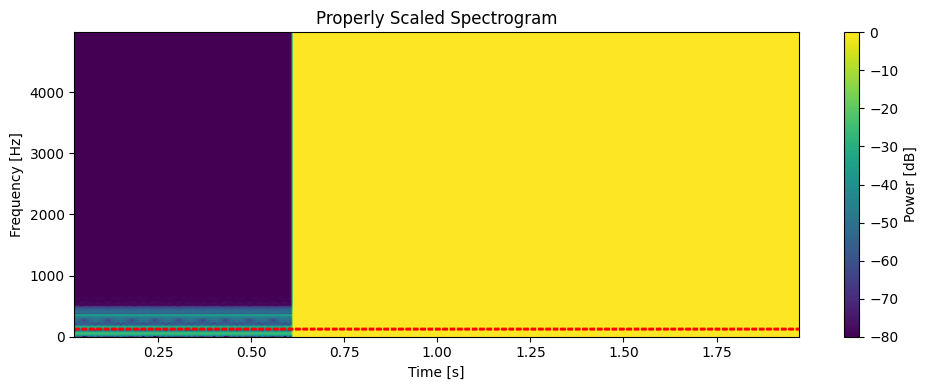

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Sampling rate
fs = 10000

# Simulated time-series signal
t = np.linspace(0, 2, 2 * fs, endpoint=False)
segment = (
    0.5 * np.sin(2 * np.pi * 50 * t) +
    0.3 * np.sin(2 * np.pi * 150 * t) +
    0.2 * np.sin(2 * np.pi * 350 * t)
)

# Frequency bands to highlight
frequency_ranges = [
    (120, 125),
    (125, 130),
    (135, 140)
]

# Desired shape
out_shape = (256, 256)

def segment_to_spectrogram(segment, fs, out_shape):
    f, t_vals, Sxx = spectrogram(segment, fs, nperseg=512, noverlap=256)
    Sxx_db = 10 * np.log10(Sxx + 1e-8)

    # Trim or pad to desired shape
    h, w = min(Sxx_db.shape[0], out_shape[0]), min(Sxx_db.shape[1], out_shape[1])
    out = np.zeros(out_shape)
    out[:h, :w] = Sxx_db[:h, :w]

    return f[:h], t_vals[:w], out  # ✅ Match values with the reshaped image

# Get spectrogram
f, t_vals, Sxx_db = segment_to_spectrogram(segment, fs, out_shape)

# Plot
plt.figure(figsize=(10, 4))

# Use accurate frequency and time ranges
extent = [t_vals[0], t_vals[-1], f[0], f[-1]]

plt.imshow(Sxx_db, aspect='auto', origin='lower', extent=extent, cmap='viridis')
plt.colorbar(label='Power [dB]')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Properly Scaled Spectrogram')

# Mark frequency ranges
for low, high in frequency_ranges:
    plt.axhline(y=low, color='red', linestyle='--', linewidth=1)
    plt.axhline(y=high, color='red', linestyle='--', linewidth=1)
    plt.fill_betweenx(np.linspace(low, high, 2), t_vals[0], t_vals[-1], color='red', alpha=0.1)

plt.tight_layout()
plt.show()


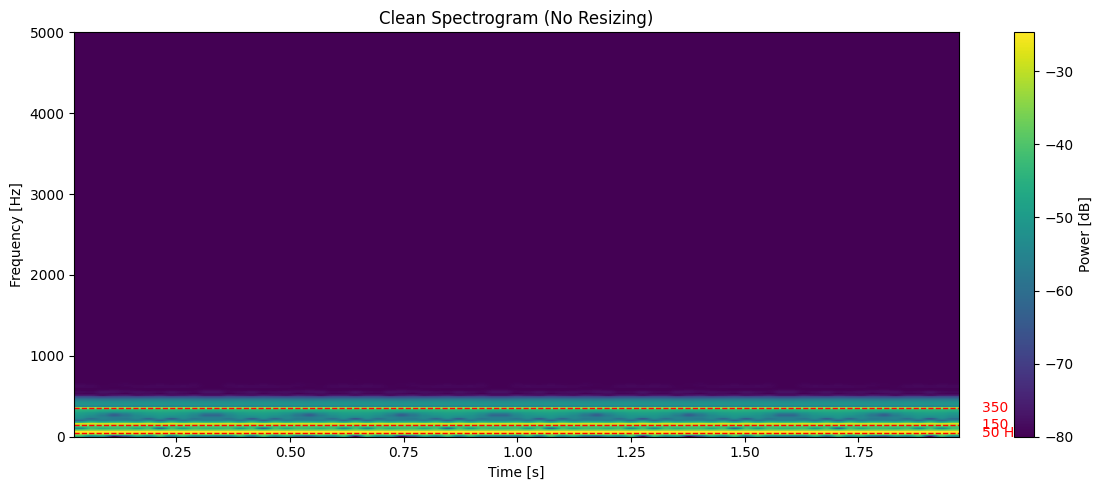

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# --- Signal Parameters ---
fs = 10000  # Sampling frequency
duration = 2  # seconds

# --- Simulated Signal ---
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
signal = (
    0.5 * np.sin(2 * np.pi * 50 * t) +
    0.3 * np.sin(2 * np.pi * 150 * t) +
    0.2 * np.sin(2 * np.pi * 350 * t)
)

# --- Spectrogram ---
f, t_vals, Sxx = spectrogram(signal, fs=fs, nperseg=512, noverlap=256)
Sxx_db = 10 * np.log10(Sxx + 1e-8)  # Convert to dB

# --- Plotting ---
plt.figure(figsize=(12, 5))

plt.imshow(
    Sxx_db,
    aspect='auto',
    origin='lower',
    extent=[t_vals[0], t_vals[-1], f[0], f[-1]],
    cmap='viridis'
)
plt.colorbar(label='Power [dB]')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Clean Spectrogram (No Resizing)')

# --- Mark Known Frequencies ---
for freq in [50, 150, 350]:
    plt.axhline(freq, color='red', linestyle='--', linewidth=1)
    plt.text(t_vals[-1] + 0.05, freq, f"{freq} Hz", color='red', va='center')

plt.tight_layout()
plt.show()
